In [1]:

access_point = 'cheops_server'
if access_point == 'home':
    path = '/home/apolo/Documents/DataAnalysis/TK_projects/CalciumImaging/'
elif access_point == 'cheops_server':
    path = '/projects/ag-korotkova/v1/korotkova_group/matlab_scripts/Rob/CalciumImaging'


In [2]:

%matplotlib widget
import os
os.chdir(path + '/scripts/spatial_metrics/')

import cell_model_base as cs_model
import detect_peaks as dp
import numpy as np
import matplotlib.pyplot as plt
import spatial_metrics_spikes_base as pl
import helper_functions as hf
import scipy.stats as stats


In [3]:

RatSession='Sst'
day = 1
ch = 1
dataset = 'Exploration'
mintimespent = 0.1
minvisits = 1
speed_threshold = 2.5
num_surrogates = 200
num_cores = 20
nbins_pos_x = 10
nbins_pos_y = 10
saving = False
saving_string='Spikes'


video_srate = 50.
total_Time = 500
_lambda = 50

x_coordinates,y_coordinates,speed,timevector = cs_model.generate_randomWalk2(input_srate = video_srate,input_total_Time = total_Time,heading_srate = 10., speed_srate = 5., rho1  = 1,sigma = 0.02,mu_e  = 0.,smooth_coeff = 0.5)
timestamps = cs_model.generate_arrivals(_lambda,total_Time)

I_timestamps = (timestamps*video_srate).astype(int)

modulated_timestamps = cs_model.digitize_spiketimes(x_coordinates,y_coordinates,I_timestamps,x_center = 50,y_center = 50, s = 5)

I_timestamps = np.sort(np.random.choice(modulated_timestamps,100,replace=False))

place_cell = pl.PlaceCell(RatSession = 'Sst',day = 1, shank = 1, neuron = 1, dataset = 'VTA',video_srate = video_srate,mintimespent = 1, minvisits = 1, speed_threshold = 100, num_surrogates = 20,num_cores = 20, nbins_pos_x = 20,nbins_pos_y = 20, saving = False,saving_string='Spikes',surrogate_window=5)
# place_cell = pl.PlaceCell(RatSession = RatSession,day = ses, shank = shank, neuron = neuron, dataset = 'VTA',video_srate = video_srate,mintimespent = 0, minvisits = 0, speed_threshold = 0, num_surrogates = 200,num_cores = 40, nbins_pos_x = 20,nbins_pos_y = 20, saving = True,saving_string=activity_type,surrogate_window=5,saving_path=saving_path)

outputdict = place_cell.main(I_timestamps,timevector,x_coordinates,y_coordinates)



/projects/ag-korotkova/v1/korotkova_group/matlab_scripts/Rob/CalciumImaging/scripts/spatial_metrics/spatial_metrics_spikes_base.py:169: RuntimeWarning: invalid value encountered in true_divide
  place_field = spike_rate_occupancy/position_occupancy
/projects/ag-korotkova/v1/korotkova_group/matlab_scripts/Rob/CalciumImaging/scripts/spatial_metrics/spatial_metrics_spikes_base.py:283: RuntimeWarning: invalid value encountered in double_scalars
  I_spk = I_sec/overall_frate
/projects/ag-korotkova/v1/korotkova_group/matlab_scripts/Rob/CalciumImaging/scripts/spatial_metrics/spatial_metrics_spikes_base.py:142: RuntimeWarning: invalid value encountered in double_scalars
  sparsity = np.nanmean(position_occupancy_norm*place_field)**2/np.nanmean(position_occupancy_norm*place_field**2)


File not saved!


In [4]:
place_cell.get_speed(x_coordinates,y_coordinates,timevector)

array([ 0.12557769,  0.12557769,  0.15906243, ..., 48.28291339,
       42.5755942 ,  0.        ])

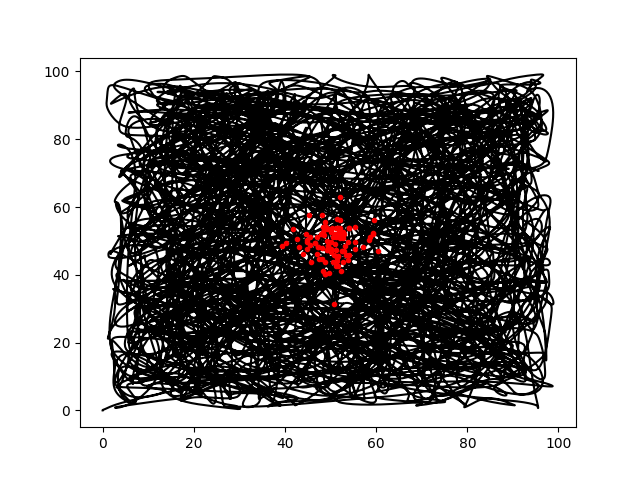

In [5]:
plt.figure()
plt.plot(x_coordinates,y_coordinates,'k')
plt.plot(x_coordinates[I_timestamps],y_coordinates[I_timestamps],'r.')
plt.show()

In [6]:
place_cell = pl.PlaceCell(RatSession = 'Sst',day = 1, shank = 1, neuron = 1, dataset = 'VTA',video_srate = video_srate,mintimespent = 1, minvisits = 1, speed_threshold = 100, num_surrogates = 20,num_cores = 20, nbins_pos_x = 20,nbins_pos_y = 20, saving = False,saving_string='Spikes',surrogate_window=5)


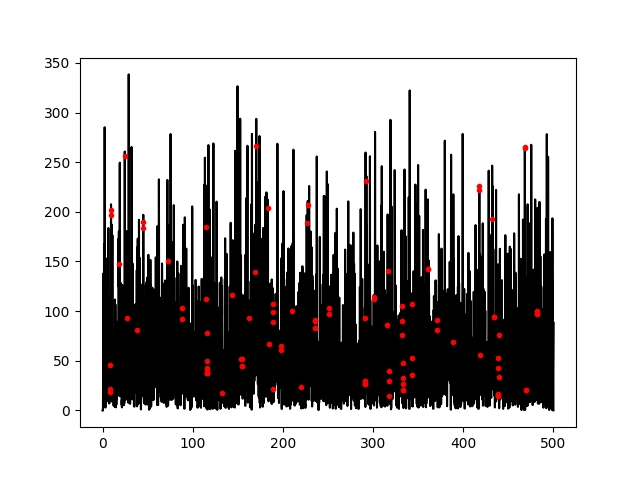

In [7]:
plt.figure()
plt.plot(timevector,speed,'k')
plt.plot(timevector[I_timestamps],speed[I_timestamps],'r.')
plt.show()

In [8]:
speed_threshold = 100

In [9]:
x_coordinates_valid

NameError: name 'x_coordinates_valid' is not defined

In [ ]:
speed = place_cell.get_speed(x_coordinates,y_coordinates,timevector)

x_coordinates_valid,y_coordinates_valid = place_cell.get_valid_timepoints(speed,x_coordinates,y_coordinates,speed_threshold)

plt.figure()
plt.plot(timevector,speed,'k')
plt.plot(timevector,x_coordinates_valid,'g')
# plt.plot(timevector[I_timestamps],speed[I_timestamps],'r.')
plt.show()


In [ ]:
outputdict['numb_events']

In [ ]:
outputdict.keys()

In [ ]:

plt.figure()
plt.pcolormesh(outputdict['x_grid'],outputdict['y_grid'],outputdict['spike_rate_occupancy'])
plt.plot(x_coordinates[I_timestamps],y_coordinates[I_timestamps],'r.')
plt.colorbar()
plt.show()


In [ ]:

plt.figure()
plt.pcolormesh(outputdict['x_grid'],outputdict['y_grid'],outputdict['place_field'])
plt.colorbar()
plt.show()


In [ ]:

plt.figure()
plt.pcolormesh(outputdict['x_grid'],outputdict['y_grid'],outputdict['place_field_smoothed'])
plt.colorbar()
plt.show()


In [ ]:

plt.figure()
plt.pcolormesh(outputdict['x_grid'],outputdict['y_grid'],outputdict['visitsMap'])
plt.colorbar()
plt.show()


In [ ]:
outputdict.keys()

In [ ]:

plt.figure()
plt.pcolormesh(outputdict['x_grid'],outputdict['y_grid'],outputdict['ocuppancyMap'])
plt.colorbar()
plt.show()


In [ ]:

plt.figure()
plt.hist(outputdict['I_sec_permutation'],color='black')
plt.plot([outputdict['I_sec'],outputdict['I_sec']],[0,20],'r')
plt.show()
(outputdict['I_sec'] - np.nanmean(outputdict['I_sec_permutation']))/np.nanstd(outputdict['I_sec_permutation'])

In [ ]:

plt.figure()
plt.hist(outputdict['I_spk_permutation'],color='black')
plt.plot([outputdict['I_spk'],outputdict['I_spk']],[0,20],'r')
plt.show()
(outputdict['I_spk'] - np.nanmean(outputdict['I_spk_permutation']))/np.nanstd(outputdict['I_spk_permutation'])
